# 🎓 TP : Introduction aux Bases de Données & Python

**Cours : Data Management - Course 4**

## 🎯 Objectifs du Notebook

Ce TP interactif vous permettra de manipuler les concepts théoriques vus en cours :

1.  **Pandas vs SQL** : Comprendre les jointures et les limites de Pandas.
2.  **SQL (Relationnel)** : Créer et requêter une base de données locale (SQLite).
3.  **NoSQL (Document)** : Simuler une structure JSON flexible (type MongoDB).
4.  **Graph Databases** : Visualiser des relations (Noeuds/Arêtes).
5.  **ORM (Object-Relational Mapping)** : Comprendre le lien entre Objets Python et Tables.

## 🛠️ Étape 0 : Préparation

Exécutez cette cellule pour importer les outils nécessaires.
Nous utiliserons `sqlite3` (inclus dans Python) pour le SQL et `networkx` pour simuler une base de données Graphe.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

print("Environnement chargé avec succès !")

Environnement chargé avec succès !


## 🐼 Partie 1 : Pandas et ses limites (Relationnel en mémoire)

Comme vu en cours (Slide 6), Pandas charge tout en RAM. C'est génial pour l'analyse, mais moins pour le stockage massif.
Cependant, la logique de **Jointure** est la même que dans les bases de données.

### 1.1 Création des données (Simulation)

Nous avons deux tables : `utilisateurs` et `commandes`.

In [2]:
# Création des DataFrames (Ne pas modifier)
users_data = {
    'user_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'email': ['alice@email.com', 'bob@email.com', 'charlie@email.com', 'david@email.com']
}

orders_data = {
    'order_id': [101, 102, 103, 104, 105],
    'user_id': [1, 2, 1, 3, 5], # Notez que l'utilisateur 5 n'existe pas dans users
    'amount': [250, 120, 80, 450, 90]
}

df_users = pd.DataFrame(users_data)
df_orders = pd.DataFrame(orders_data)

print("--- Users ---")
display(df_users)
print("\n--- Orders ---")
display(df_orders)

--- Users ---


,user_id,name,email
0,1,Alice,alice@email.com
1,2,Bob,bob@email.com
2,3,Charlie,charlie@email.com
3,4,David,david@email.com



--- Orders ---


,order_id,user_id,amount
0,101,1,250
1,102,2,120
2,103,1,80
3,104,3,450
4,105,5,90


### 1.2 Exercice : Jointures (Merge)

Votre mission : Réaliser une jointure pour associer chaque commande à son utilisateur.

1.  Faites un **Inner Join** (seules les correspondances parfaites sont gardées).
2.  Faites un **Left Join** (toutes les commandes sont gardées, même si l'utilisateur est inconnu).

*Aide : Regardez les slides 8 et 9 (`pd.merge`).*

In [3]:
# 1. Inner Join (Commandes ET Utilisateurs correspondants)
# --- À COMPLÉTER ---
df_inner = pd.merge(df_orders, df_users, on='user_id', how='inner')

print("--- Inner Join ---")
display(df_inner)

# 2. Left Join (Toutes les commandes, afficher NaN si utilisateur inconnu)
# --- À COMPLÉTER ---
df_left = pd.merge(df_orders, df_users, on='user_id', how='left')

print("\n--- Left Join (Remarquez la ligne avec user_id=5) ---")
display(df_left)

--- Inner Join ---


,order_id,user_id,amount,name,email
0,101,1,250,Alice,alice@email.com
1,102,2,120,Bob,bob@email.com
2,103,1,80,Alice,alice@email.com
3,104,3,450,Charlie,charlie@email.com



--- Left Join (Remarquez la ligne avec user_id=5) ---


,order_id,user_id,amount,name,email
0,101,1,250,Alice,alice@email.com
1,102,2,120,Bob,bob@email.com
2,103,1,80,Alice,alice@email.com
3,104,3,450,Charlie,charlie@email.com
4,105,5,90,NaN,NaN


## 🗄️ Partie 2 : Bases de données Relationnelles (SQL)

Pandas est limité par la RAM. Pour stocker et requêter efficacement, on utilise le SQL.
Nous allons utiliser **SQLite**, une base de données légère contenue dans un fichier (ou en mémoire).

### 2.1 Connexion et Création de Table (DDL)

Créez une table `products` avec les colonnes : `id` (entier), `name` (texte) et `price` (réel).

*Aide : Slide 15 pour la syntaxe SQL (`CREATE TABLE`).*

In [4]:
# Connexion à une base de données en mémoire (disparaît à la fermeture)
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# --- À COMPLÉTER ---
# Écrivez la requête SQL pour créer la table 'products'
sql_create = """
CREATE TABLE products (
    product_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    price REAL NOT NULL
);"""


# Exécution
try:
    cursor.execute(sql_create)
    print("Table 'products' créée !")
except Exception as e:
    print(f"Erreur : {e}")

Table 'products' créée !


### 2.2 Insertion et Requêtes (DML)

1.  Insérez 3 produits dans la base.
2.  Sélectionnez uniquement les produits dont le prix est supérieur à 500.

*Aide : Slide 15 (`INSERT INTO`, `SELECT ... WHERE`).*

In [5]:
# 1. Insertion de données
# --- À COMPLÉTER --- (Complétez la requête INSERT)
products_to_insert = [
    (1, 'Laptop', 1200.50),
    (2, 'Mouse', 25.00),
    (3, 'Monitor', 300.00),
    (4, 'Server', 5000.00)
]

sql_insert = "INSERT INTO products VALUES (?, ?, ?)"
cursor.executemany(sql_insert, products_to_insert)
conn.commit()
print("Données insérées.")

# 2. Lecture (SELECT)
# --- À COMPLÉTER --- (Écrivez la requête pour filtrer price > 500)
sql_select = "SELECT * FROM products WHERE price > 500"

# Exécution et affichage
cursor.execute(sql_select)
results = cursor.fetchall()

print("\n--- Produits chers (> 500) ---")
for row in results:
    print(row)

Données insérées.

--- Produits chers (> 500) ---
(1, 'Laptop', 1200.5)
(4, 'Server', 5000.0)


## 📑 Partie 3 : NoSQL (Document Store)

Comme vu slide 18, les bases NoSQL (type MongoDB) n'ont pas de schéma fixe. Elles stockent des documents (souvent au format JSON).

### 3.1 Simulation d'une collection MongoDB

En Python, un document NoSQL ressemble à un **Dictionnaire**. Une collection est une **Liste** de dictionnaires.

**Exercice :** Observez la structure flexible (certains ont des "tags", d'autres non). Ajoutez un nouveau "document" (film) de votre choix dans la liste avec une structure différente (ex: ajouter un champ "actors").

In [6]:
# Simulation d'une collection 'movies'
movies_collection = [
    {"_id": 1, "title": "Inception", "director": "Nolan", "year": 2010},
    {"_id": 2, "title": "Matrix", "year": 1999, "tags": ["sci-fi", "action"]},
    {"_id": 3, "title": "Shrek", "year": 2001, "tags": ["animation"], "rating": 8.5}
]

# --- À COMPLÉTER ---
# Créez un dictionnaire représentant un film et ajoutez-le à la liste (append)
new_movie = {
    "_id": 4,
    "title": "Will Hunting",
    "director": "Van Sant",
    "year": 1997,
    "tags": ["jsp", "drama"],
    "rating": 9.3
}

# Ajout
movies_collection.append(new_movie)

print("Collection mise à jour :")
for doc in movies_collection:
    print(doc)

Collection mise à jour :
{'_id': 1, 'title': 'Inception', 'director': 'Nolan', 'year': 2010}
{'_id': 2, 'title': 'Matrix', 'year': 1999, 'tags': ['sci-fi', 'action']}
{'_id': 3, 'title': 'Shrek', 'year': 2001, 'tags': ['animation'], 'rating': 8.5}
{'_id': 4, 'title': 'Will Hunting', 'director': 'Van Sant', 'year': 1997, 'tags': ['jsp', 'drama'], 'rating': 9.3}


## 🕸️ Partie 4 : Graph Databases

Les bases Graphes (Neo4j) stockent des **Noeuds** et des **Relations** (Slide 22). C'est idéal pour les réseaux sociaux ou la détection de fraude.

### 4.1 Visualisation d'un réseau social

Nous allons utiliser `networkx` pour dessiner un graphe simple.

**Exercice :**

1.  Ajoutez un noeud `"Moi"`.
2.  Ajoutez une relation (edge) entre `"Moi"` et `"Alice"` (type "FRIEND").
3.  Exécutez le code pour voir le graphe.

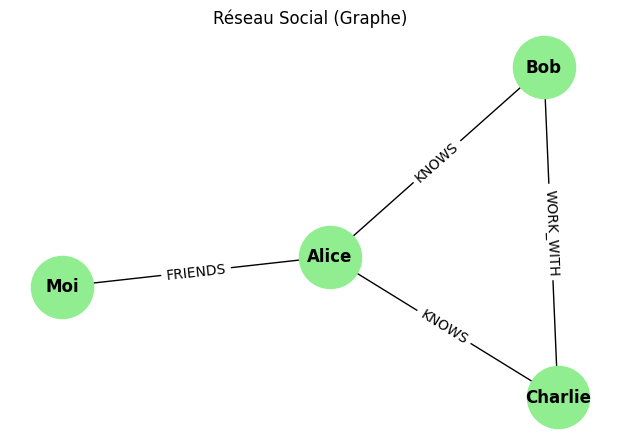

In [7]:
G = nx.Graph()

# Ajout de noeuds et relations existants
G.add_edge("Alice", "Bob", relation="KNOWS")
G.add_edge("Bob", "Charlie", relation="WORK_WITH")
G.add_edge("Alice", "Charlie", relation="KNOWS")

# --- À COMPLÉTER ---
# 1. Ajoutez votre noeud (simplement en créant une relation)
G.add_edge("Moi", "Alice", relation="FRIENDS")


# Visualisation (Ne touchez pas à ce bloc)
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Réseau Social (Graphe)")
plt.show()

## 🐍 Partie 5 : Python & ORM (Object Relational Mapping)

Comme vu slide 33, un ORM permet de manipuler une base de données en utilisant des **Objets** Python, sans écrire de SQL.

### 5.1 Simulation de classe ORM

Imaginez que la classe `User` ci-dessous est liée à une table SQL `users`.

**Exercice :** Créez une nouvelle *instance* de la classe `User` pour représenter une nouvelle ligne dans la base de données.

In [8]:
class User:
    def __init__(self, id, name, email):
        self.id = id
        self.name = name
        self.email = email
    
    def save(self):
        # Simulation d'une sauvegarde en base de données
        print(f"✅ INSERT INTO users VALUES ({self.id}, '{self.name}', '{self.email}')")

# --- À COMPLÉTER ---
# Créez un nouvel utilisateur (id=10, nom="VotreNom", email="...")
new_user = User(10, "Malik", "malik.dahmani@dauphine.eu") # Remplacez par vos données

# Sauvegardez-le
new_user.save()

✅ INSERT INTO users VALUES (10, 'Malik', 'malik.dahmani@dauphine.eu')


## 🧠 Bonus : Vector Database (IA)

Les bases vectorielles stockent des "embeddings" (listes de nombres) pour faire de la recherche sémantique (Slide 27).

**Concept :** Deux vecteurs proches mathématiquement représentent deux textes similaires.

In [9]:
# Simulation de vecteurs (Embeddings)
vec_chat = np.array([0.9, 0.1, 0.5])
vec_chien = np.array([0.8, 0.2, 0.4])
vec_banane = np.array([0.1, 0.9, 0.2])

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Testons la similarité
sim_chat_chien = cosine_similarity(vec_chat, vec_chien)
sim_chat_banane = cosine_similarity(vec_chat, vec_banane)

print(f"Similarité Chat <-> Chien : {sim_chat_chien:.2f} (Élevée)")
print(f"Similarité Chat <-> Banane : {sim_chat_banane:.2f} (Faible)")

Similarité Chat <-> Chien : 0.99 (Élevée)
Similarité Chat <-> Banane : 0.29 (Faible)


**Félicitations !** Vous avez exploré les différents types de bases de données modernes.